# Creating your own dataset from Google Images

*by: Francisco Ingham and Jeremy Howard. Inspired by [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)*

In this tutorial we will see how to easily create an image dataset through Google Images. **Note**: You will have to repeat these steps for any new category you want to Google (e.g once for dogs and once for cats).

## Get a list of URLs

### Search and scroll

Go to [Google Images](http://images.google.com) and search for the images you are interested in. The more specific you are in your Google Search, the better the results and the less manual pruning you will have to do.

Scroll down until you've seen all the images you want to download, or until you see a button that says 'Show more results'. All the images you scrolled past are now available to download. To get more, click on the button, and continue scrolling. The maximum number of images Google Images shows is 700.

It is a good idea to put things you want to exclude into the search query, for instance if you are searching for the Eurasian wolf, "canis lupus lupus", it might be a good idea to exclude other variants:

    "canis lupus lupus" -dog -arctos -familiaris -baileyi -occidentalis

You can also limit your results to show only photos by clicking on Tools and selecting Photos from the Type dropdown.

### Download into file

Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

Press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>J</kbd> in Windows/Linux and <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>J</kbd> in Mac, and a small window the javascript 'Console' will appear. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. You can do this by running the following commands:

```javascript
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

### Create directory and upload urls file into your server

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
folders = ['realist', 'surrealist', 'impressionist', 'pop', 'cubist', 'baroque']
files = ['realist.txt', 'surrealist.txt', 'impressionist.txt', 'pop.txt', 'cubist.txt', 'baroque.txt']

In [4]:
path = Path('data/art_styles')

### Download Images

Now you will need to download you images from their respective urls.

fast.ai has a function that allows you to do just that. You just have to specify the urls filename and the destination folder and this function will download and save all images that can be opened. If they have some problem in being opened, they will not be saved.

Let's download our images! Notice you can choose a maximum number of images to be downloaded. In this case we will not download all the urls.

You will need to run this line once for every category.

In [4]:
for i, file in enumerate(files):    
    dest = path/folders[i]
    dest.mkdir(parents=True, exist_ok=True)
    download_images(path/file, dest)

Error http://www.artistrw.com/Gallery%20T_files/image050.jpg HTTPConnectionPool(host='www.artistrw.com', port=80): Max retries exceeded with url: /Gallery%20T_files/image050.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7fa919aeacf8>: Failed to establish a new connection: [Errno -2] Name or service not known',))
Error http://www.artistrw.com/Gallery%20T_files/image046.jpg HTTPConnectionPool(host='www.artistrw.com', port=80): Max retries exceeded with url: /Gallery%20T_files/image046.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7fa919ae2320>: Failed to establish a new connection: [Errno -2] Name or service not known',))
Error http://www.gms3.com/pix_m/Elliot_2002_1_m.jpg HTTPConnectionPool(host='www.gms3.com', port=80): Max retries exceeded with url: /pix_m/Elliot_2002_1_m.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7fa919ac9e10>: Failed to establish a new connection: [Errno -3

Error https://evepostbooks.com/wp-content/uploads/2015/05/American-Surrealist-Coverwoblackbar-e1440772189262.jpg HTTPSConnectionPool(host='evepostbooks.com', port=443): Max retries exceeded with url: /wp-content/uploads/2015/05/American-Surrealist-Coverwoblackbar-e1440772189262.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'ssl3_get_server_certificate', 'certificate verify failed')],)",),))
Error https://classicalartsuniverse.com/wp-content/uploads/2016/03/Guernica-CAU.jpg HTTPSConnectionPool(host='classicalartsuniverse.com', port=443): Max retries exceeded with url: /wp-content/uploads/2016/03/Guernica-CAU.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'ssl3_get_server_certificate', 'certificate verify failed')],)",),))
Error http://www.canvasmatch.com/assets/img/art/surrealist_apple.jpg HTTPConnectionPool(host='www.canvasmatch.com', port=80): Max retries exceeded with url: /assets/img/art/surrealist_apple.jpg (Caused by NewConnecti

Error https://www.christies.edu/-/media/images/continuing-education/art-history/london/great-masters-of-impressionism/great-masters-of-impressionism_banner.jpg HTTPSConnectionPool(host='www.christies.edu', port=443): Max retries exceeded with url: /-/media/images/continuing-education/art-history/london/great-masters-of-impressionism/great-masters-of-impressionism_banner.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'ssl3_get_server_certificate', 'certificate verify failed')],)",),))
Error https://orsay.kimbellart.org/sites/orsay.kimbellart.org/files/styles/slider/public/renoir_thereader_finalslider.jpg?itok=uKr8YYbG HTTPSConnectionPool(host='orsay.kimbellart.org', port=443): Max retries exceeded with url: /sites/orsay.kimbellart.org/files/styles/slider/public/renoir_thereader_finalslider.jpg?itok=uKr8YYbG (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'ssl3_get_server_certificate', 'certificate verify failed')],)",),))
Error https://orsa

Error http://www.picturework.com.au/images/stories/virtuemart/product/AL%20DEARUS115409%20DOG%20POP%20ART.jpg HTTPConnectionPool(host='www.picturework.com.au', port=80): Max retries exceeded with url: /images/stories/virtuemart/product/AL%20DEARUS115409%20DOG%20POP%20ART.jpg (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fa918a65160>, 'Connection to www.picturework.com.au timed out. (connect timeout=4)'))


Error https://www.pablopicasso.org/images/paintings/portuguese.jpg HTTPSConnectionPool(host='www.pablopicasso.org', port=443): Max retries exceeded with url: /images/paintings/portuguese.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'ssl3_get_server_certificate', 'certificate verify failed')],)",),))
Error https://www.pablopicasso.org/images/paintings/ma-jolie.jpg HTTPSConnectionPool(host='www.pablopicasso.org', port=443): Max retries exceeded with url: /images/paintings/ma-jolie.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'ssl3_get_server_certificate', 'certificate verify failed')],)",),))
Error https://i1.wp.com/www.art-mine.com/collectorscorner/wp-content/uploads/2017/08/Untitled-design-3.png?fit=885%2C490&ssl=1 HTTPSConnectionPool(host='i1.wp.com', port=443): Read timed out. (read timeout=4)
Error http://cubismsite.com/wp-content/uploads/2016/08/Pablo-Picasso-The-Reservoir-1909-1.jpg ('Connection aborted.', RemoteDisconnected(

Error http://hasshe.com/img/s/pwCRoyzMPXfdQtjDF1wTJgHaE8.jpg ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response',))
Error https://www.invaluable.com/blog/wp-content/uploads/2018/06/Wikimedia-Princess-Salon-Edited.jpg HTTPSConnectionPool(host='www.invaluable.com', port=443): Read timed out. (read timeout=4)
Error x-raw-image:///a4048e98775502f94e76485b3c46f10722b41aa3c8ea1b7f74d997a1af1b2920 No connection adapters were found for 'x-raw-image:///a4048e98775502f94e76485b3c46f10722b41aa3c8ea1b7f74d997a1af1b2920'
Error https://fineartdelivered.com/6750-home_default/tobit-and-anna.jpg HTTPSConnectionPool(host='fineartdelivered.com', port=443): Max retries exceeded with url: /6750-home_default/tobit-and-anna.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'ssl3_get_server_certificate', 'certificate verify failed')],)",),))
Error https://www.xs-collectibles.com/images/large/pr-10-p.gif HTTPSConnectionPool(host='www.xs-collectibles

Then we can remove any images that can't be opened:

In [5]:
for f in folders:
    print(f)
    verify_images(path/f, delete=True, max_workers=8)

realist


cannot identify image file <_io.BufferedReader name='data/art_styles/realist/00000260.jpg'>
cannot identify image file <_io.BufferedReader name='data/art_styles/realist/00000259.jpg'>
cannot identify image file <_io.BufferedReader name='data/art_styles/realist/00000137.jpg'>
cannot identify image file <_io.BufferedReader name='data/art_styles/realist/00000456.jpg'>
cannot identify image file <_io.BufferedReader name='data/art_styles/realist/00000157.jpg'>
cannot identify image file <_io.BufferedReader name='data/art_styles/realist/00000015.jpg'>
cannot identify image file <_io.BufferedReader name='data/art_styles/realist/00000149.jpg'>
cannot identify image file <_io.BufferedReader name='data/art_styles/realist/00000068.jpg'>
cannot identify image file <_io.BufferedReader name='data/art_styles/realist/00000522.jpg'>
cannot identify image file <_io.BufferedReader name='data/art_styles/realist/00000115.jpg'>
cannot identify image file <_io.BufferedReader name='data/art_styles/realist/000

cannot identify image file <_io.BufferedReader name='data/art_styles/surrealist/00000441.jpg'>
cannot identify image file <_io.BufferedReader name='data/art_styles/surrealist/00000450.jpg'>
cannot identify image file <_io.BufferedReader name='data/art_styles/surrealist/00000101.jpg'>
cannot identify image file <_io.BufferedReader name='data/art_styles/surrealist/00000127.jpg'>
cannot identify image file <_io.BufferedReader name='data/art_styles/surrealist/00000177.jpg'>
cannot identify image file <_io.BufferedReader name='data/art_styles/surrealist/00000305.jpg'>
cannot identify image file <_io.BufferedReader name='data/art_styles/surrealist/00000273.jpg'>
cannot identify image file <_io.BufferedReader name='data/art_styles/surrealist/00000398.jpg'>
cannot identify image file <_io.BufferedReader name='data/art_styles/surrealist/00000011.jpg'>
cannot identify image file <_io.BufferedReader name='data/art_styles/surrealist/00000522.jpg'>
cannot identify image file <_io.BufferedReader nam

cannot identify image file <_io.BufferedReader name='data/art_styles/impressionist/00000190.jpg'>
cannot identify image file <_io.BufferedReader name='data/art_styles/impressionist/00000142.jpg'>
cannot identify image file <_io.BufferedReader name='data/art_styles/impressionist/00000115.jpg'>
cannot identify image file <_io.BufferedReader name='data/art_styles/impressionist/00000314.jpg'>
cannot identify image file <_io.BufferedReader name='data/art_styles/impressionist/00000337.jpg'>
cannot identify image file <_io.BufferedReader name='data/art_styles/impressionist/00000390.jpg'>
cannot identify image file <_io.BufferedReader name='data/art_styles/impressionist/00000430.jpg'>
cannot identify image file <_io.BufferedReader name='data/art_styles/impressionist/00000554.jpg'>
cannot identify image file <_io.BufferedReader name='data/art_styles/impressionist/00000135.jpg'>
cannot identify image file <_io.BufferedReader name='data/art_styles/impressionist/00000406.jpeg'>
cannot identify ima

cannot identify image file <_io.BufferedReader name='data/art_styles/pop/00000260.jpg'>
cannot identify image file <_io.BufferedReader name='data/art_styles/pop/00000319.jpg'>
cannot identify image file <_io.BufferedReader name='data/art_styles/pop/00000308.jpg'>
cannot identify image file <_io.BufferedReader name='data/art_styles/pop/00000492.jpg'>
cannot identify image file <_io.BufferedReader name='data/art_styles/pop/00000264.png'>
cannot identify image file <_io.BufferedReader name='data/art_styles/pop/00000381.jpg'>
cannot identify image file <_io.BufferedReader name='data/art_styles/pop/00000121.jpg'>
cannot identify image file <_io.BufferedReader name='data/art_styles/pop/00000397.jpg'>
cannot identify image file <_io.BufferedReader name='data/art_styles/pop/00000389.svg'>
cannot identify image file <_io.BufferedReader name='data/art_styles/pop/00000197.png'>
cannot identify image file <_io.BufferedReader name='data/art_styles/pop/00000301.jpg'>
cannot identify image file <_io.

cannot identify image file <_io.BufferedReader name='data/art_styles/cubist/00000457.jpg'>
cannot identify image file <_io.BufferedReader name='data/art_styles/cubist/00000335.jpg'>
cannot identify image file <_io.BufferedReader name='data/art_styles/cubist/00000293.jpg'>
cannot identify image file <_io.BufferedReader name='data/art_styles/cubist/00000181.jpg'>
cannot identify image file <_io.BufferedReader name='data/art_styles/cubist/00000272.jpg'>
cannot identify image file <_io.BufferedReader name='data/art_styles/cubist/00000195.jpg'>
cannot identify image file <_io.BufferedReader name='data/art_styles/cubist/00000515.jpg'>
cannot identify image file <_io.BufferedReader name='data/art_styles/cubist/00000318.jpg'>
cannot identify image file <_io.BufferedReader name='data/art_styles/cubist/00000423.jpg'>
cannot identify image file <_io.BufferedReader name='data/art_styles/cubist/00000375.jpg'>
baroque
cannot identify image file <_io.BufferedReader name='data/art_styles/baroque/00000

Image size (163328704 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
cannot identify image file <_io.BufferedReader name='data/art_styles/baroque/00000159.jpg'>
cannot identify image file <_io.BufferedReader name='data/art_styles/baroque/00000351.jpg'>
cannot identify image file <_io.BufferedReader name='data/art_styles/baroque/00000096.jpg'>
cannot identify image file <_io.BufferedReader name='data/art_styles/baroque/00000142.jpg'>
cannot identify image file <_io.BufferedReader name='data/art_styles/baroque/00000405.jpg'>
cannot identify image file <_io.BufferedReader name='data/art_styles/baroque/00000002.jpg'>
cannot identify image file <_io.BufferedReader name='data/art_styles/baroque/00000333.jpg'>
cannot identify image file <_io.BufferedReader name='data/art_styles/baroque/00000076.jpg'>


## View data

In [5]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Good! Let's take a look at some of our pictures then.

In [6]:
data.classes

['baroque', 'cubist', 'impressionist', 'pop', 'realist', 'surrealist']

['baroque', 'cubist', 'impressionist', 'pop', 'realist', 'surrealist']

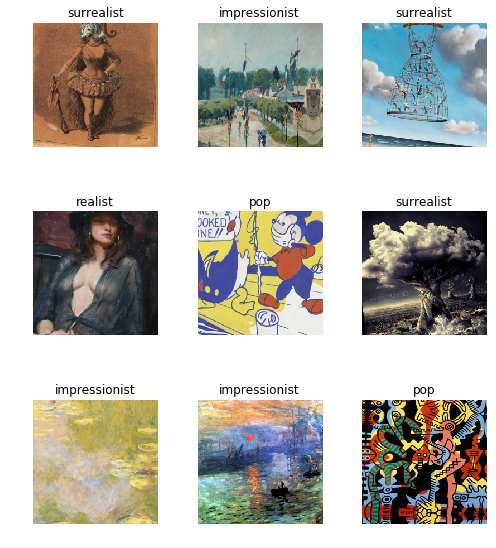

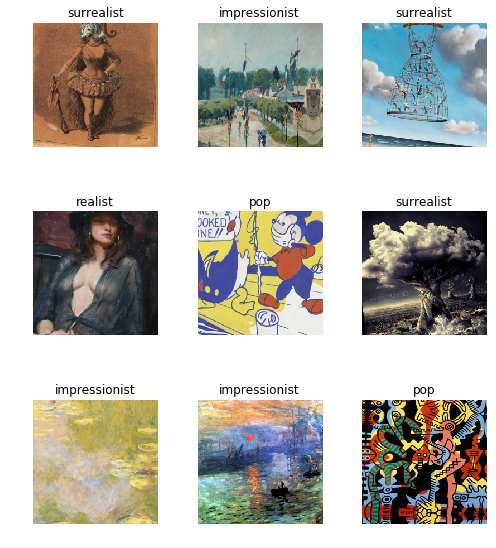

In [7]:
data.show_batch(rows=3, figsize=(7,8))

In [7]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['baroque', 'cubist', 'impressionist', 'pop', 'realist', 'surrealist'],
 6,
 2808,
 701)

## Train model

In [8]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [9]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


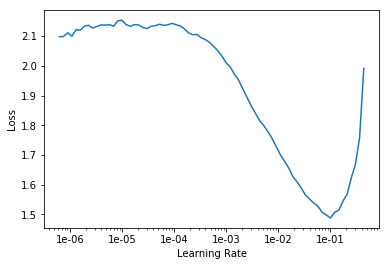

In [10]:
learn.recorder.plot()

In [11]:
lr = 5e-3

In [12]:
learn.fit_one_cycle(4, slice(lr))

epoch,train_loss,valid_loss,error_rate
1,1.123121,0.681566,0.239658
2,0.812905,0.645460,0.228245
3,0.659735,0.554796,0.208274
4,0.542796,0.543492,0.205421


In [13]:
learn.save('stage-1')

In [14]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


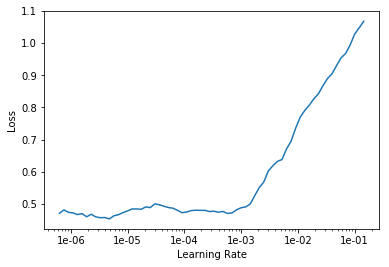

In [15]:
learn.lr_find()
learn.recorder.plot()

In [16]:
learn.fit_one_cycle(6, slice(lr/100, lr/5))

epoch,train_loss,valid_loss,error_rate
1,0.459037,0.554661,0.191155
2,0.434869,0.686150,0.212554
3,0.356170,0.567310,0.171184
4,0.259038,0.531453,0.159772
5,0.182449,0.481233,0.152639
6,0.122681,0.483442,0.151213


In [17]:
learn.save('stage-2')

In [18]:
learn.fit_one_cycle(6, slice(lr/100, lr/5))

epoch,train_loss,valid_loss,error_rate
1,0.093578,0.624374,0.186876
2,0.168613,0.984556,0.238231
3,0.260143,0.775399,0.233951
4,0.200082,0.564841,0.165478
5,0.132037,0.538902,0.155492
6,0.091047,0.536679,0.154066


In [9]:
learn.load('stage-2')

Learner(data=ImageDataBunch;
Train: LabelList
y: CategoryList (2808 items)
[Category baroque, Category baroque, Category baroque, Category baroque, Category baroque]...
Path: data/art_styles
x: ImageItemList (2808 items)
[Image (3, 400, 620), Image (3, 564, 1000), Image (3, 480, 338), Image (3, 415, 915), Image (3, 372, 672)]...
Path: data/art_styles;
Valid: LabelList
y: CategoryList (701 items)
[Category pop, Category baroque, Category realist, Category pop, Category impressionist]...
Path: data/art_styles
x: ImageItemList (701 items)
[Image (3, 600, 600), Image (3, 625, 504), Image (3, 374, 236), Image (3, 496, 673), Image (3, 460, 674)]...
Path: data/art_styles;
Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=Fa

Learner(data=ImageDataBunch;
Train: LabelList
y: CategoryList (2808 items)
[Category baroque, Category baroque, Category baroque, Category baroque, Category baroque]...
Path: data/art_styles
x: ImageItemList (2808 items)
[Image (3, 400, 620), Image (3, 564, 1000), Image (3, 480, 338), Image (3, 415, 915), Image (3, 372, 672)]...
Path: data/art_styles;
Valid: LabelList
y: CategoryList (701 items)
[Category pop, Category baroque, Category realist, Category pop, Category impressionist]...
Path: data/art_styles
x: ImageItemList (701 items)
[Image (3, 600, 600), Image (3, 625, 504), Image (3, 374, 236), Image (3, 496, 673), Image (3, 460, 674)]...
Path: data/art_styles;
Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=Fa

## resnet-50

In [20]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


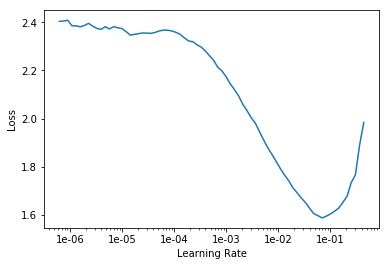

In [21]:
learn.lr_find()
learn.recorder.plot()

In [22]:
lr = 2e-3

In [23]:
learn.fit_one_cycle(4, slice(lr))

epoch,train_loss,valid_loss,error_rate
1,1.408380,0.703914,0.226819
2,0.906858,0.610043,0.208274
3,0.710807,0.569981,0.209700
4,0.604787,0.562150,0.213980


In [24]:
learn.save('res50-stage-1')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


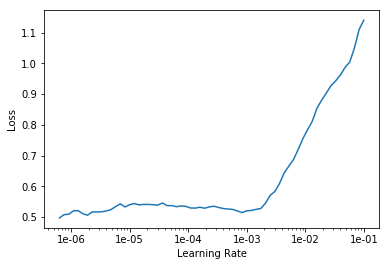

In [25]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [26]:
learn.fit_one_cycle(8, slice(lr/100, lr/5))

epoch,train_loss,valid_loss,error_rate
1,0.517400,0.545790,0.201141
2,0.474038,0.533487,0.186876
3,0.399830,0.500916,0.155492
4,0.303972,0.530129,0.188302
5,0.233922,0.532752,0.178317
6,0.167146,0.507591,0.176890
7,0.127271,0.508156,0.168331
8,0.106151,0.511384,0.169757


In [27]:
learn.save('res50-stage-2')

## Interpretation

In [28]:
learn.load('stage-2')
interp = ClassificationInterpretation.from_learner(learn)

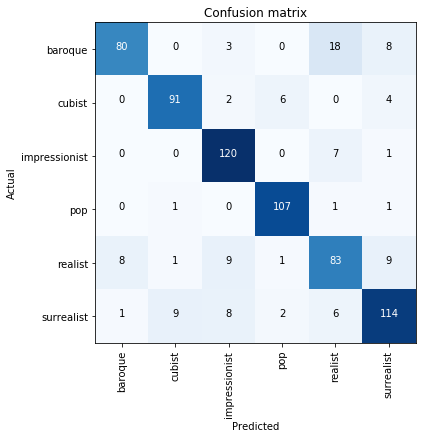

In [29]:
interp.plot_confusion_matrix(figsize=(6,6))

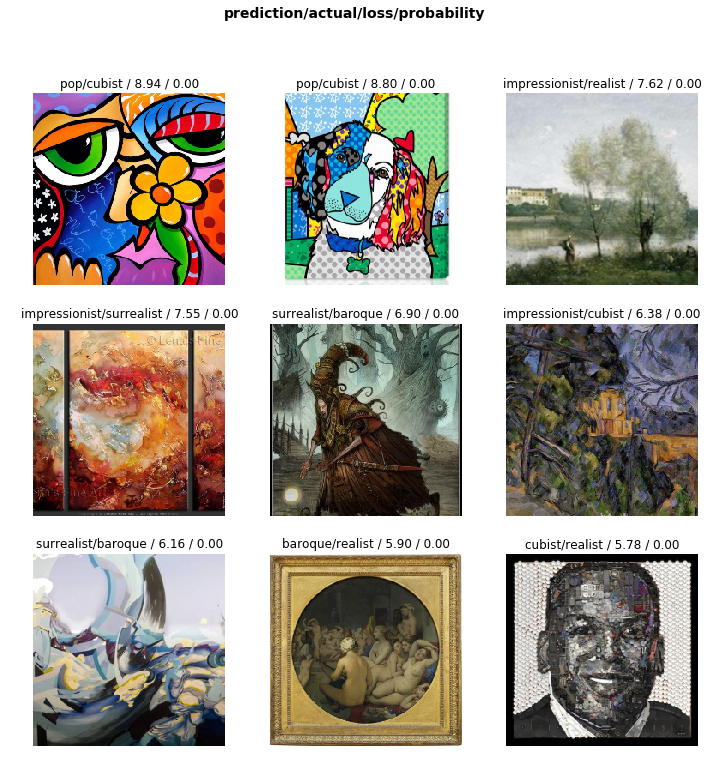

In [30]:
interp.plot_top_losses(9)

In [31]:
interp.most_confused(min_val=10)

[('baroque', 'realist', 18)]

## Check for mislabelled data

Some images in the top losses are clearly either mislabelled or just don't seem to belong to any of the categories (bottom-right for example). Let's see if we can either relabel or delete these as appropriate.

In [32]:
from fastai.widgets import *

In [33]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Train)
ImageCleaner(ds, idxs)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

There seemed to be a fair number of `training` images mislabelled as `impressionist`. Now that we'd gotten rid of most of them (hopefully), let's looks for those bad `validation` images we saw above.

In [34]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)
ImageCleaner(ds, idxs)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

I noticed a few problems when looking through the `validation` examples:
1. Some examples were probably mislabelled but I couldn't tell with the naked eye what the correct class was.
2. There appears to be overlap between the `realist` and `baroque` styles. I can't say more on this without further research on each style though.
3. We have a few `pop cubist` examples. Maybe a multilevel classification model could be a cool future endeavour to capture the inherent ambiguity and overlap in how artworks are classified. However, generating labels will likely prove a difficult task.
4. I believe the consensus is that Van Gogh's *Starry Night* is classified as `post impressionist`, but there is some disagrement about this. We have it labelled as `impressionist` as you can see above (far-right).

When unsure what to do, I erred on the side of inaction. I'd much rather underestimate than overestimate the performance of my model. Moreover, it would be nice if we have a `CNN` that could account and correct for some amount of noise in the training data.

### TODO: Retraining

## Inference

In [10]:
data.export()

In [11]:
data_inf = (ImageDataBunch.load_empty(path, tfms=get_transforms(), size=224)
            .normalize(imagenet_stats)
           )

In [12]:
learn = create_cnn(data_inf, models.resnet34).load('stage-2')

In [13]:
img = data.train_ds[0][0]
learn.predict(img)

(Category baroque,
 tensor(0),
 tensor([9.9572e-01, 6.1022e-06, 4.0723e-06, 1.8343e-06, 3.5493e-03, 7.2278e-04]))

(Category baroque,
 tensor(0),
 tensor([9.9572e-01, 6.1022e-06, 4.0723e-06, 1.8343e-06, 3.5493e-03, 7.2278e-04]))

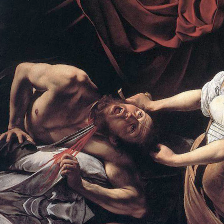

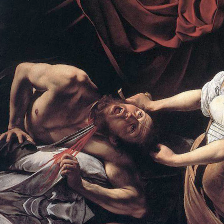

In [14]:
img